As I am not sure, that I understood the task, so I provide some description.
What my functhion does is that it compares two images (the first input is the image, in which my func tries to find fragments with stronger correlation with the second image). So, starting from top left corner, the func makes some computations(about them below) using a fragment of the first image.
For correlation I use sum of products of corresponding values of matrices. For normalization I use subtracting width a half of 255 to have a range (-127.5, 127.5) instead of (0, 255) in matrices before multiplying. After computations I normalize resulting matrix, so it has values in range (0, 255) and 0 (black) stands for larger correlation result.
I could't find how to convert output array  to PNG-image in a simple manner, so I left it as it was. For visualization I used matplot, however it is not used for function performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
#here the first random image is created
im1 = np.random.randint(255, size=(50, 50))

In [3]:
im1


array([[174,  87,  51, ...,  18,  91,  74],
       [152,   1,  21, ..., 147, 247, 252],
       [206, 224, 233, ..., 218,  61,  60],
       ...,
       [ 18, 117, 196, ...,  22,  50, 119],
       [ 15, 187, 169, ..., 247, 160,  27],
       [159,  74, 245, ...,  83, 197,  35]])

In [4]:
im1.shape

(50, 50)

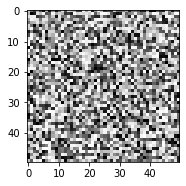

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.imshow(im1, interpolation='nearest', cmap=cm.Greys_r)


plt.show()

In [13]:
#here the first image is sliced to create the second one, 
#it helps to visualize function results, as this fragment certainly has 1.0 correlation coefficient at least once
im2 = im1.copy()[0:10, 0:10]

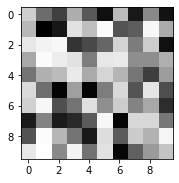

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.imshow(im2, interpolation='nearest', cmap=cm.Greys_r)


plt.show()

In [15]:
im2.shape

(10, 10)

In [245]:
def corr(in1, in2):
    #checking for proper image sizes
    if (in1.shape[0] > in2.shape[0]) & (in1.shape[1] > in2.shape[1]):
        #computing size of correlation image
        W = in1.shape[1] - in2.shape[1] + 1 #41
        H = in1.shape[0] - in2.shape[0] + 1 #41
        #creating array of zeros with corresponding size of
        #all possible positions of the second image over the first one
        corr = np.zeros(W*H)
        #let i be responsible for row indexing and j for column indexing
        for i in range (H):
            for j in range(W):
                #slicing a sample of image 1 for current position of image 2
                sample = in1.copy()[i:i+in2.shape[0], j:j+in2.shape[1]]
                #correlation coefficient for each position is computed
                corr[(i * W) + j] = np.sum((sample-127.5) * (in2-127.5))
            i +=1
        #then resulting matrix is normalized, as it's said above    
        corr = np.round(255*(1-((corr-np.min(corr))/(np.max(corr)-np.min(corr)))), 0)
        #reshaping from 1D-array to use as an image
        corr = corr.reshape(W, H)
            
        return corr
    else:
        print('image fragment is bigger than original image.')
    

In [246]:
#this cells I used to debug my function
import sys

np.set_printoptions(threshold=sys.maxsize)
result = corr(im1, im2)

In [247]:
result

array([[  0., 191., 176., 197., 197., 194., 188., 179., 168., 209., 180.,
        177., 182., 199., 217., 229., 184., 185., 192., 158., 205., 177.,
        199., 169., 207., 200., 178., 190., 165., 156., 164., 173., 170.,
        212., 160., 164., 195., 169., 216., 207., 199.],
       [173., 200., 175., 196., 154., 195., 206., 210., 172., 206., 192.,
        195., 217., 210., 201., 221., 182., 179., 208., 171., 195., 149.,
        203., 190., 208., 199., 170., 194., 232., 177., 196., 197., 191.,
        199., 176., 187., 224., 212., 200., 205., 250.],
       [205., 214., 176., 212., 202., 177., 208., 169., 191., 201., 158.,
        162., 176., 191., 175., 203., 191., 183., 168., 157., 162., 177.,
        226., 204., 171., 201., 188., 191., 186., 206., 191., 206., 206.,
        178., 207., 200., 195., 193., 191., 148., 180.],
       [208., 205., 200., 207., 202., 184., 207., 200., 237., 156., 194.,
        209., 216., 204., 203., 187., 212., 195., 202., 213., 243., 175.,
        209., 1

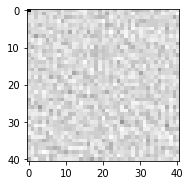

In [248]:
#and here we have correlation image with significant large value in position 0, 0.
fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.imshow(result, interpolation='nearest', cmap=cm.Greys_r)


plt.show()

In [249]:
#one more result
im3 = im1.copy()[10:20, 20:30]

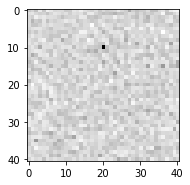

In [250]:
result = corr(im1, im3)
fig = plt.figure()
ax1 = fig.add_subplot(121)

ax1.imshow(result, interpolation='nearest', cmap=cm.Greys_r)


plt.show()

In [251]:
corr(im3, im1)

image pattern is bigger than original image.
